In [2]:
%matplotlib inline
from mpmorph.analysis.diffusion import Activation, Diffusion
import glob
p = glob.glob("./liquid_Na/Na_df*/run0/XDATCAR.gz")

# Exmaple 1: Obtaining D from an MD run

In [3]:
# Let's get structures for one of the MD runs available in example runs path (p).
from pymatgen.io.vasp.outputs import Xdatcar
structures = Xdatcar(p[2]).structures

In [4]:
# Initialize a Diffusion calculator
d = Diffusion(structures, 300, 2, skip_first=250)

In [5]:
# Get diffusion coefficients and standard errors from block averaging
d.getD("Na")

{'D': 0.00022111868110501922,
 'D_std': 5.5085146875530359e-05,
 'Dx': 0.0002133696465970773,
 'Dx_std': 4.0300442811345721e-05,
 'Dy': 0.00024155617346295966,
 'Dy_std': 8.844256068973984e-05,
 'Dz': 0.00020843022325502073,
 'Dz_std': 5.530485002247422e-05}

In [6]:
# Number of time origins (blocks) used in averaging
d.n_origins

4

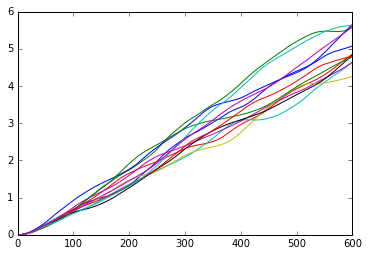

In [7]:
# A quick look at all msd (x,y,z) data from all blocks
d.plot_block_msds()

In [8]:
# The relaxation time can be roughly estimated too (we recommend setting corr_t larger than this number)
d.tao

{'D': 226.12291168765046,
 'Dx': 234.33511184662052,
 'Dy': 206.99119084061428,
 'Dz': 239.8884346960732}

# Exmaple 2: Obtaining Activation Energies for Diffusio 

Activation calculator can be initialized with a list of dicts as returned by Diffusion.getD()
But a more convenient way is using the Activation.from_run_paths constructor and point to the
list of MD runs. 

In [9]:
# Let's get the list of temperatures from the paths in p for this example
T = [ float(t.split("/")[-3].split("_")[2]) for t in p]

In [10]:
# Since diffusion coefficients will have to be computed, initialization will take a while.
a = Activation.from_run_paths(p, T, "Na", 400, 1, 500, l_lim=40, skip_first=500)

In [11]:
# Only Q: regular least-squares linear regression of Activation Energy Q (in units of K)
a.LS()

1676.4721892877608

In [12]:
# Advanced:
# Q and Q_std: orthongal distance regression to obtain Q allows measurement errors in independent variables too.
# Therefore the errors obtained in block averaging of D can further be considered along with fitting error to yield
# standard deviation type error for the calculated Activation Energy
a.ODR()

(1692.4958799498236, 281.79995580223056)

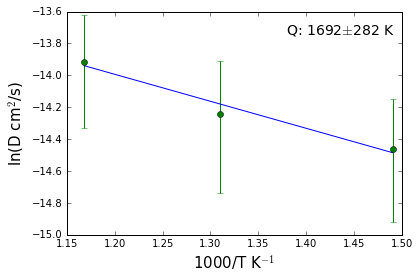

In [13]:
f = a.plot(**{'fmt':'o'})